<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/noteboos/data_for_Ziyun_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toy data set for analysis
* Update 9/2/22 - included Ca data
* 12/2/22 - refactoring. Moved all the definitions to a separate file called `analysis.py` on the drive. Uploaded more spike and calcium data. FYI: the naming of the calcium data has changed to `dfof.csv`.
* 12/4/22 refactoring: `analysis.py` moved to `code` folder
* 4/30/23 using code from gitlab - GT 

### Example Dataset for correlation analysis

In [1]:
!git clone https://github.com/GergelyTuri/sleep.git

Cloning into 'sleep'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 117 (delta 53), reused 79 (delta 24), pack-reused 0
Receiving objects: 100% (117/117), 21.98 KiB | 7.33 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [1]:
%cd '/content/sleep/'
!git pull

/content/sleep
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5 (delta 3), reused 5 (delta 3), pack-reused 0
Unpacking objects: 100% (5/5), 432 bytes | 216.00 KiB/s, done.
From https://github.com/GergelyTuri/sleep
   f1e0490..8f70606  master     -> origin/master
Updating f1e0490..8f70606
Fast-forward
 base/xcorr/xcorr_analysis.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [2]:
import sys
from pathlib import Path
# from os.path import join

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns

import collections

import scipy.stats as stats

sys.path.append('/content/sleep/')

from sleep.base import core
from sleep.base.xcorr import xcorr_analysis as xa

In [3]:
drive = core.GoogleDrive()
core.mount_drive()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# # use your gmail during this
# from google.colab import drive
# drive.mount('/gdrive')
# sys.path.insert(0,"/content/gdrive/My Drive/Colab Notebooks/python_package/")
# sys.path.append('/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/colab notebooks/code')

# # importing helper definitions after the drive is mounted
# import analysis as an

Mounted at /gdrive


#### I/O

In [3]:
data_dir = '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/'
            # '5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC2-004/'

### Prepping all Data to be analyzed:

In [4]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1EOacWE5VxDHwrU5ktkiOVQaO7MfZZxjgnSWWh_QLT0Y/edit#gid=0')

# get_all_values gives a list of rows.
sheet = worksheet.worksheet("Sheet1")
rows = sheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
data_to_analyze =  pd.DataFrame.from_records(rows)
new_header = data_to_analyze.iloc[0] #grab the first row for the header
data_to_analyze = data_to_analyze[1:] #take the data less the header row
data_to_analyze.columns = new_header #set the header row as the df header
data_to_analyze

,mouseID,day,sessionID,cellType,trialID,eeg_data,significantCells,sima folder,note
1,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_GC1-001,GC,747,velo_eeg.csv,redo,TSeries-07072021-0833_GC1-001_Cycle00001_Eleme...,
2,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_GC2-003,GC,745,velo_eeg.csv,redo,TSeries-07072021-0833_GC2-003_Cycle00001_Eleme...,"looks good, uploaded"
3,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_MC1-002,MC,740,velo_eeg.csv,redo,TSeries-07072021-0833_MC1-002_Cycle00001_Eleme...,
4,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_MC2-004,MC,749,velo_eeg.csv,redo,TSeries-07072021-0833_MC2-004_Cycle00001_Eleme...,"nice, uploaded"
5,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_GC-001,GC,762,velo_eeg.csv,redo,TSeries-07062021-0844_GC-001_Cycle00001_Elemen...,uploaded
6,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_MC-002,MC,761,velo_eeg.csv,redo,TSeries-07062021-0844_MC-002_Cycle00001_Elemen...,uploaded
7,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_MC2-004,MC,760,velo_eeg.csv,redo,TSeries-07062021-0844_MC2-004_Cycle00001_Eleme...,"best, uploaded"
8,126031_5,11_23,TSeries-11232022-GC-MC-002,GC,876,velo_eeg.csv,redo,TSeries-11232022-GC-MC-002.sima,"very nice 2p, but ca signal craps off after ab..."


In [ ]:
" cluster change between wake and sleep"

' cluster change between wake and sleep'

In [ ]:

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('A new spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)
# Go to https://sheets.google.com to see your new spreadsheet.

{'spreadsheetId': '1jCRxSZ8ov2xI9aWxbr2d2y5fG8FVOhTY2VEakCrU2GA',
 'updatedRange': "'工作表1'!A1:C2",
 'updatedRows': 2,
 'updatedColumns': 3,
 'updatedCells': 6}

Loading data from a single session

In [5]:
data_dict = xa.data_loader(data_dir, 'dfof', data_to_analyze.loc[1,'mouseID'],
               data_to_analyze.loc[1,'day'],
               data_to_analyze.loc[1,'sessionID'])

number of cells in this recording: 94


In [6]:
data_dict.keys()

dict_keys(['dfof', 'significant_cells', 'eeg_velocity'])

In [7]:
calcium = data_dict['dfof']
significant_cells = data_dict['significant_cells']
eeg_velocity = data_dict['eeg_velocity']

##### Plotting calcium and spike data side-by-side from one cell:
Doesn't work as is, unless you load the spike data as well

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
# fig.suptitle('Calcium and deconvolved spikes')
# # first half of the recording
# ax1.plot(np.array(calcium.iloc[0][:int(len(calcium.iloc[0])/2)]))
# ax1.plot(np.array(spikes.iloc[0][:int(len(spikes.iloc[0])/2)]))
# # second half of the recording
# ax2.plot(np.array(calcium.iloc[0][int(len(calcium.iloc[0])/2):]))
# ax2.plot(np.array(spikes.iloc[0][int(len(spikes.iloc[0])/2):]))
# ax2.legend(['calcium', 'spikes'])

In [8]:
# refactoring
# returning the signifiantly upregulated cells' ID-s
state = 'NREM'

# returning the signifiantly upregulated / downregulated cells' ID-s
index_list = xa.significant_cells(significant_cells, state)
index_list_upregulated = index_list['Upregulated']
index_list_downregulated = index_list['Downregulated']
print(f'number of significantly upregulated cells: {len(index_list_upregulated)}')
print(f'number of significantly downregulated cells: {len(index_list_downregulated)}')

# filtering all the cells based on ☝🏻
# you can change this 👇 variable to calcium or spikes depending on what you want 
# to see
###############
data = calcium# 👈 # takes spikes or calcium
###############
sig_up_cells_df = data[data.index.isin(index_list_upregulated)]
sig_down_cells_df = data[data.index.isin(index_list_downregulated)]


number of significantly upregulated cells: 16
number of significantly downregulated cells: 31


In [9]:
# setting up filters for brain states based on activity and EEG data
filters, states = xa.brain_state_filter(eeg_velocity, ['NREM', 'REM', 'awake'])

eeg_velocity['state:NREM'] = filters['NREM']
eeg_velocity['state:REM'] = filters['REM']
eeg_velocity['state:awake'] = filters['awake']
eeg_velocity['state:locomotion'] = filters['locomotion']

Making filters for ['NREM', 'REM', 'awake'] and locomotion


In [10]:
# changing boolean values to numeric to make life (and plotting) easier

df = eeg_velocity[['state:NREM', 'state:REM', 'state:awake',
                 'state:locomotion']]
df['state:NREM'] = df['state:NREM'].replace({True: 1, False:0})
df['state:REM'] = df['state:REM'].replace({True: 2, False:0})
df['state:awake'] = df['state:awake'].replace({True: 3, False:0})
df['state:locomotion'] = df['state:locomotion'].replace({True: 4, False:0})

# this is a bit sketchy👇🏻. make sure the states are distinct
# (no overlap), otherwise you'll end up with weird stuff
#
# IS THIS OK?????
#
eeg_velocity['state'] = df['state:NREM'] + df['state:REM'] + df[
    'state:awake'] + df['state:locomotion']

# values and coresponding numbers in the 'state' column:
# 1 = NREM
# 2 = REM
# 3 = awake
# 4 = locomotion
# 0 = WHY is this? I guess there is some overlap after all.

<ipython-input-10-502c13aa9424>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state:NREM'] = df['state:NREM'].replace({True: 1, False:0})
<ipython-input-10-502c13aa9424>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state:REM'] = df['state:REM'].replace({True: 2, False:0})
<ipython-input-10-502c13aa9424>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

#### We have selected the significantly up and downregulated cells. We also have filters to tell brain states. Let's concatenate each cell's activity durig awake and NREM states:

In [11]:
df_awake = eeg_velocity[eeg_velocity['state']==3]
aw_up = sig_up_cells_df[sig_up_cells_df.columns[df_awake.index]]
aw_down = sig_down_cells_df[sig_down_cells_df.columns[df_awake.index]]
data_awake_up = aw_up.T.reset_index(drop=True)
data_awake_down = aw_down.T.reset_index(drop=True)

df_nrem = eeg_velocity[eeg_velocity['state']==1]
nrem_up = sig_up_cells_df[sig_up_cells_df.columns[df_nrem.index]]
nrem_down = sig_down_cells_df[sig_down_cells_df.columns[df_nrem.index]]
data_nrem_up = nrem_up.T.reset_index(drop=True)
data_nrem_down = nrem_down.T.reset_index(drop=True)


In [12]:
# double check if awake and nrem respond to same set of cells
for i in range(data_awake_up.shape[0]):
  row = data_awake_up.iloc[[i]]
  if row.index[0] not in list(data_nrem_up.index):
    print('Not same cells')
    break
else:
  print('Same cells')

Not same cells


In [14]:
# checking max and min values in the xcorr matrix for visually pleasing plotting
max = np.max(xa.upper(data_awake_up.corr()))
min = np.min(xa.upper(data_awake_up.corr()))

In [15]:
data_awake_up

roi_label,0000-0331-0109,0000-0260-0399,0000-0316-0439,0000-0362-0135,0000-0298-0429,0000-0400-0102,0000-0395-0268,0000-0450-0135,0000-0386-0203,0000-0338-0064,0000-0285-0362,0000-0297-0163,0000-0191-0222,0000-0370-0455,0000-0208-0043,0000-0309-0114
0,0.005017,1.496694,0.408975,0.383502,1.079380,0.226303,0.481894,0.732083,0.881049,0.268143,0.090441,0.763102,0.949973,0.134752,-0.160782,0.277634
1,0.456146,0.550770,0.030647,0.345607,-0.061796,0.067485,0.366883,0.178611,0.148524,-0.107785,0.150749,-0.365115,0.209957,0.078007,0.361461,0.188639
2,0.199135,0.919671,0.551818,0.185475,0.230813,0.394045,0.149310,0.400688,-0.027508,0.262387,0.390217,-0.027522,0.196473,0.282023,-0.255334,0.157585
3,0.075541,0.556927,-0.294159,0.133644,0.230185,0.063576,0.524928,0.252504,0.170482,0.316055,0.295884,-0.111548,0.203602,0.111558,0.576497,0.070833
4,0.249797,0.566770,0.094542,0.487167,0.091640,-0.008454,0.037115,0.224248,0.050530,0.297797,-0.006252,-0.191795,0.129271,0.390745,-0.396765,-0.109759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14039,-0.427637,0.849640,-0.465344,0.088215,1.845577,0.219447,0.557203,-0.246959,0.163024,0.448713,0.051430,0.079130,0.391836,0.207740,0.099351,0.211353
14040,-0.274999,0.679099,-0.035111,-0.280236,0.474016,-0.019470,0.472351,0.159288,-0.065030,-0.022548,-0.178411,0.111943,0.201823,0.024980,0.616989,0.038598
14041,0.181726,0.120104,0.357783,0.124640,0.294327,-0.040951,0.484911,0.288227,0.885236,0.622938,0.268100,0.061443,0.154690,-0.166531,-0.172802,0.095101
14042,0.092208,0.245074,0.080432,0.228458,1.196808,0.074511,-0.392512,0.132434,-0.082855,0.397444,-0.152262,-0.166911,0.834603,0.158570,0.146046,-0.028166


Text(0.5, 1.0, 'data corr, significantly upregulated cells during awake brain state')

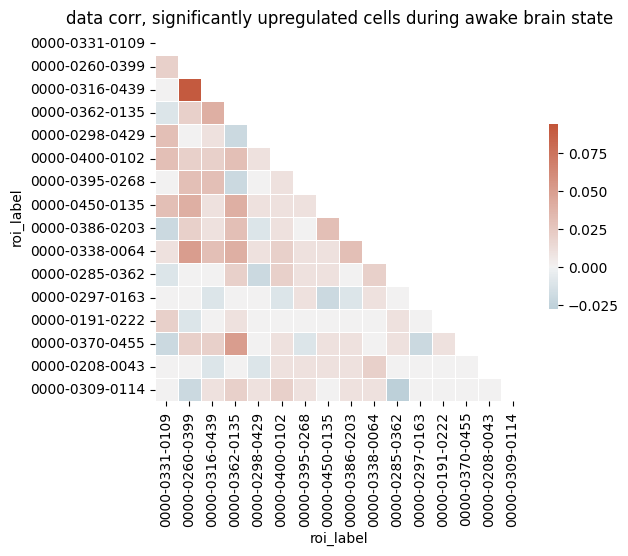

In [16]:
df = data_awake_up
title = 'data corr, significantly upregulated cells during awake brain state'

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
g = sns.heatmap(round(corr,2), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
                       vmin=min, vmax=max)
g.set_title(title)

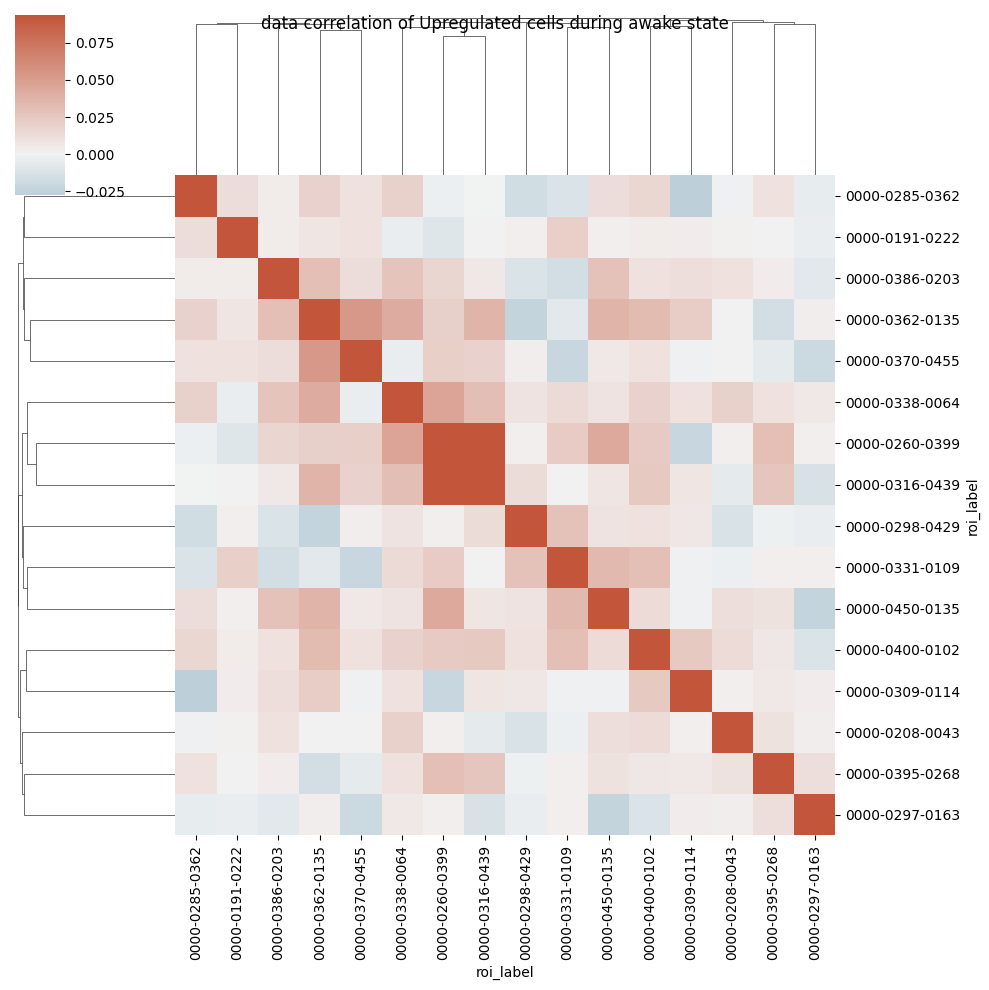

In [17]:
# seaborn built-in clusterplot
direction = 'Upregulated'
state = 'awake'
g = sns.clustermap(df.corr(), method='complete', cmap=cmap,
                  center=0, vmin=min,
                       vmax=max).fig.suptitle(
        f'data correlation of {direction} cells during {state} state')

#### Same deal for NREM sleep

In [19]:
# checkin max and min values in the xcorr matrix for visually pleasing plotting
max = np.max(xa.upper(data_nrem_up.corr()))
min = np.min(xa.upper(data_nrem_up.corr()))

Text(0.5, 1.0, 'data corr, significantly upregulated cells during NREM brain state')

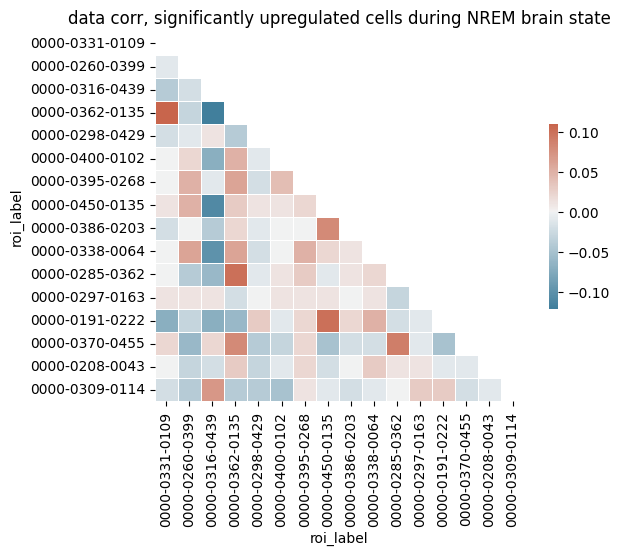

In [20]:
df = data_nrem_up
title = 'data corr, significantly upregulated cells during NREM brain state'

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
g = sns.heatmap(round(corr,2), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
                       vmin=min, vmax=max)
g.set_title(title)

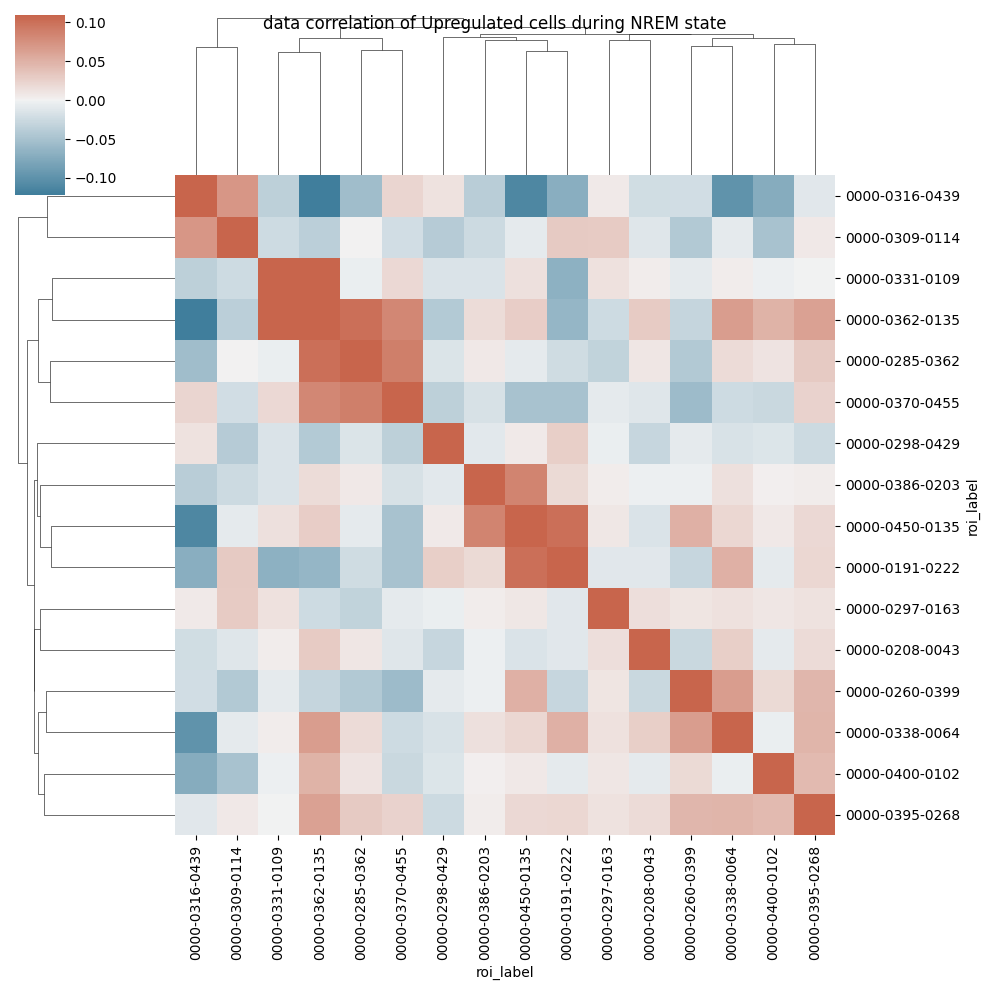

In [21]:
# seaborn built-in clusterplot
direction = 'Upregulated'
state = 'NREM'
g = sns.clustermap(df.corr(), method='complete', cmap=cmap,
                  center=0, vmin=min,
                       vmax=max).fig.suptitle(
        f'data correlation of {direction} cells during {state} state')

##Mantel Test

Null hypothesis: the two matrices are not correlated.

Result: the two matrices are positively correlated.

In [23]:
# spearman rank correlation between the two (upper) correlation matrices
# does not assume linear relationship
corr_awake_up = data_awake_up.corr()
corr_nrem_up = data_nrem_up.corr()
corr_awake_upper = xa.upper(corr_awake_up)
corr_nrem_upper = xa.upper(corr_nrem_up)
stats.spearmanr(corr_awake_upper, corr_nrem_upper)

SignificanceResult(statistic=0.1396485867074102, pvalue=0.1282031299208009)

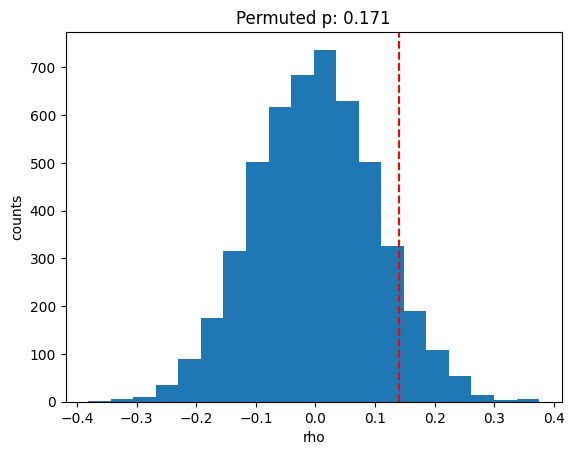

In [25]:
# Monte Carlo permutation test
np.random.seed(100)
rhos = []
n_iter = 5000
true_rho, _ = stats.spearmanr(corr_awake_upper, corr_nrem_upper)
# matrix permutation, shuffle the groups
m_ids = list(corr_awake_up.columns)
m2_v = corr_nrem_upper
for iter in range(n_iter):
  np.random.shuffle(m_ids) # shuffle list 
  r, _ = stats.spearmanr(xa.upper(corr_awake_up.loc[m_ids, m_ids]), m2_v)  
  rhos.append(r)
# two-tailed test
perm_p = ((np.sum(np.abs(true_rho) <= np.abs(rhos)))+1)/(n_iter+1) 


f,ax = plt.subplots()
plt.hist(rhos,bins=20)
ax.axvline(true_rho,  color = 'r', linestyle='--')
ax.set(title=f"Permuted p: {perm_p:.3f}", ylabel="counts", xlabel="rho")
plt.show()

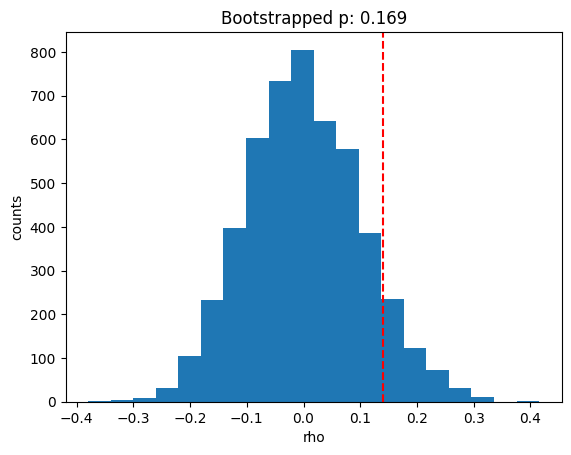

In [26]:
# Monte Carlo bootstrapping test
np.random.seed(100)
rhos = []
n_iter = 5000
true_rho, _ = stats.spearmanr(corr_awake_upper, corr_nrem_upper)
# matrix bootstrapping
m_ids = list(corr_awake_up.columns)
m2_v = corr_nrem_upper
for iter in range(n_iter):
  m_ids_bs = np.random.choice(m_ids,len(m_ids),replace=True) # bootstrapping
  r, _ = stats.spearmanr(xa.upper(corr_awake_up.loc[m_ids_bs, m_ids_bs]), m2_v)  
  rhos.append(r)
# two-tailed test, H0: two matrices are not correlated
perm_p = ((np.sum(np.abs(true_rho) <= np.abs(rhos)))+1)/(n_iter+1) 

f,ax = plt.subplots()
plt.hist(rhos,bins=20)
ax.axvline(true_rho,  color = 'r', linestyle='--')
ax.set(title=f"Bootstrapped p: {perm_p:.3f}", ylabel="counts", xlabel="rho")
plt.show()

In [ ]:
!pip install skbio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement skbio (from versions: none)
ERROR: No matching distribution found for skbio


In [ ]:
# double check with skbio's function
import skbio
from skbio import DistanceMatrix
from skbio.stats.distance import mantel
mantel(corr_awake_upper,corr_nrem_upper, method='spearman',permutations=5000)

ModuleNotFoundError: ignored

In [27]:
# pearson's correlation between the two (upper) correlation matrices
# assume the correlation is linear

# as the spikes data are either 0 or 1, maybe the correlation isn't linear
# so this test may not be reasonable
# use spearman rank correlation coefficient instead
stats.pearsonr(corr_awake_upper, corr_nrem_upper)

PearsonRResult(statistic=0.09600598491711536, pvalue=0.2969035621832778)

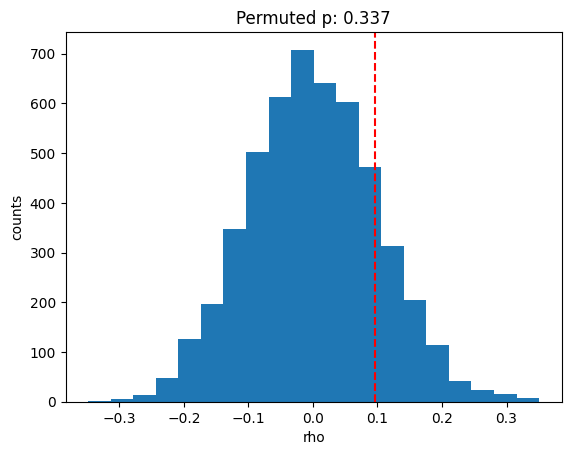

In [28]:
# Monte Carlo permutation test
np.random.seed(100)
rhos = []
n_iter = 5000
true_rho, _ = stats.pearsonr(corr_awake_upper, corr_nrem_upper)
# matrix permutation, shuffle the groups
m_ids = list(corr_awake_up.columns)
m2_v = corr_nrem_upper
for iter in range(n_iter):
  np.random.shuffle(m_ids) # shuffle list 
  r, _ = stats.pearsonr(xa.upper(corr_awake_up.loc[m_ids, m_ids]), m2_v)  
  rhos.append(r)
# two-tailed test
perm_p = ((np.sum(np.abs(true_rho) <= np.abs(rhos)))+1)/(n_iter+1) 


f,ax = plt.subplots()
plt.hist(rhos,bins=20)
ax.axvline(true_rho,  color = 'r', linestyle='--')
ax.set(title=f"Permuted p: {perm_p:.3f}", ylabel="counts", xlabel="rho")
plt.show()

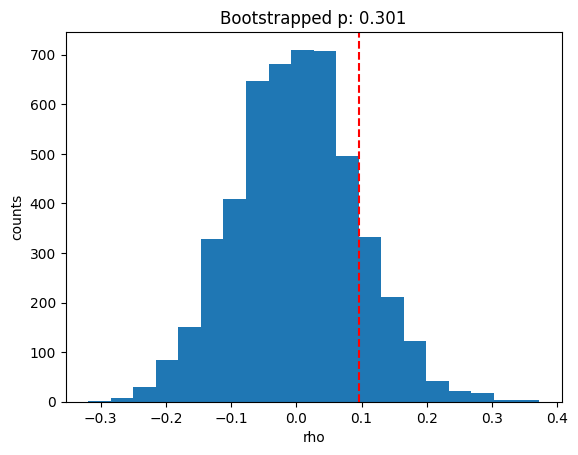

In [29]:
# Monte Carlo bootstrapping test
np.random.seed(100)
rhos = []
n_iter = 5000
true_rho, _ = stats.pearsonr(corr_awake_upper, corr_nrem_upper)
# matrix bootstrapping
m_ids = list(corr_awake_up.columns)
m2_v = corr_nrem_upper
for iter in range(n_iter):
  m_ids_bs = np.random.choice(m_ids,len(m_ids),replace=True) # bootstrapping
  r, _ = stats.pearsonr(xa.upper(corr_awake_up.loc[m_ids_bs, m_ids_bs]), m2_v)  
  rhos.append(r)
# two-tailed test, H0: two matrices are not correlated
perm_p = ((np.sum(np.abs(true_rho) <= np.abs(rhos)))+1)/(n_iter+1) 

f,ax = plt.subplots()
plt.hist(rhos,bins=20)
ax.axvline(true_rho,  color = 'r', linestyle='--')
ax.set(title=f"Bootstrapped p: {perm_p:.3f}", ylabel="counts", xlabel="rho")
plt.show()


In [ ]:
mantel(corr_awake_upper,corr_nrem_upper, method='pearson',permutations=5000)

* how we coudl compare data from multiple mice? (Gergo provides more data)
* comparing average corr between awake stationary and sleep intervals
* are the highly correlated/active cells during sleep identical to the higly correlated/active cells awake state? e.g. running clustering on the data and compare the cells' cluster identity between sleep (NREM) and awake states.

## Goal: Determine whether the correlation of calcium will be higher with a wider time gap.

In [ ]:
import pandas as pd
import numpy as np

def calculate_ave_every_20_columns(df):
    
    num_blocks = df.shape[1] // 20   
    col_names = []

    # Loop over each block of 20 columns and calculate the average
    for i in range(num_blocks):
       
        start_col = i * 20
        end_col = start_col + 20
        ave = df.iloc[:, start_col:end_col].mean(axis=1)
        col_names.append(f'Ave_{i+1}')        
        if i == 0:
            result = pd.DataFrame(ave)
        else:
            result = pd.concat([result, ave], axis=1)

    # Set the column names for the result DataFrame
    result.columns = col_names

    return result

calcium_result_20 = calculate_ave_every_20_columns(calcium).transpose()
corr_calcium= calcium_result_20.corr()
sns.heatmap(corr_calcium)
corr_calcium.iloc[0:3, :]

NameError: ignored

roi_label,0000-0191-0225,0000-0298-0404,0000-0159-0316,0000-0336-0479,0000-0309-0416,0000-0252-0379,0000-0463-0439,0000-0494-0415,0000-0299-0439,0000-0217-0255,...,0000-0226-0177,0000-0229-0149,0000-0325-0294,0000-0231-0262,0000-0314-0453,0000-0229-0205,0000-0281-0257,0000-0254-0114,0000-0226-0290,0000-0122-0117
roi_label,,,,,,,,,,,,,,,,,,,,,
0000-0191-0225,1.000000,0.425904,0.616282,0.551075,0.097410,0.544624,0.272399,0.078942,0.103819,0.622294,...,-0.142947,-0.029611,0.168643,-0.120176,0.124826,0.063567,-0.140105,0.004664,-0.049837,-0.153526
0000-0298-0404,0.425904,1.000000,0.495384,0.351004,-0.030803,0.517382,0.341493,0.047415,0.535326,0.629363,...,-0.230301,-0.115488,0.194442,-0.001008,0.085519,0.139224,-0.105666,-0.083956,-0.014868,-0.248548
0000-0159-0316,0.616282,0.495384,1.000000,0.545621,-0.096411,0.580946,0.265153,0.049391,0.080767,0.581318,...,-0.152773,0.034428,0.122118,-0.015531,0.237879,0.053923,-0.127596,-0.009579,0.042783,-0.189494


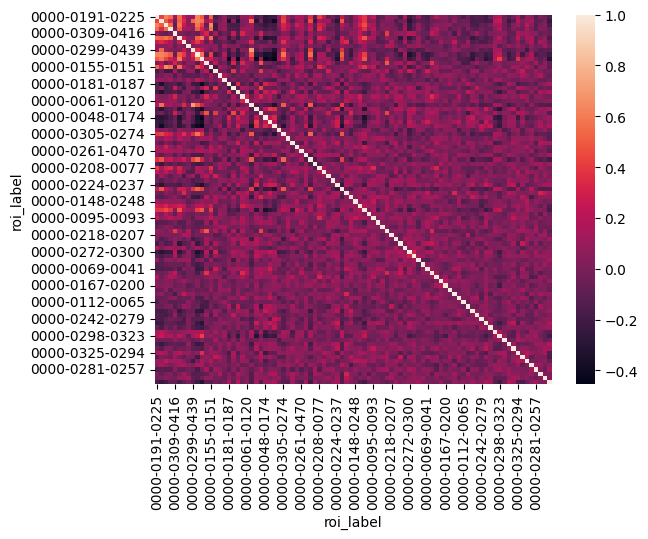

In [ ]:
import pandas as pd
import numpy as np


def calculate_ave_every_100_columns(df):
    
    num_blocks = df.shape[1] // 100   
    col_names = []

    # Loop over each block of 100 columns and calculate the average
    for i in range(num_blocks):
       
        start_col = i * 100
        end_col = start_col + 100
        ave = df.iloc[:, start_col:end_col].mean(axis=1)
        col_names.append(f'Ave_{i+1}')        
        if i == 0:
            result = pd.DataFrame(ave)
        else:
            result = pd.concat([result, ave], axis=1)

    # Set the column names for the result DataFrame
    result.columns = col_names

    return result

calcium_result_100 = calculate_ave_every_100_columns(calcium).transpose()
corr_calcium= calcium_result_100.corr()
sns.heatmap(corr_calcium)
corr_calcium.iloc[0:3, :]

### Conclusion: If we calculate the average for each 100 time laps of each cell, the correlation for each cell would increase.

## two cluster analysis have been conducted
### 1. K-means cluster
### 2. Hierarchical Cluster

## K-means cluster
### -- method to quickly cluster large data sets.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

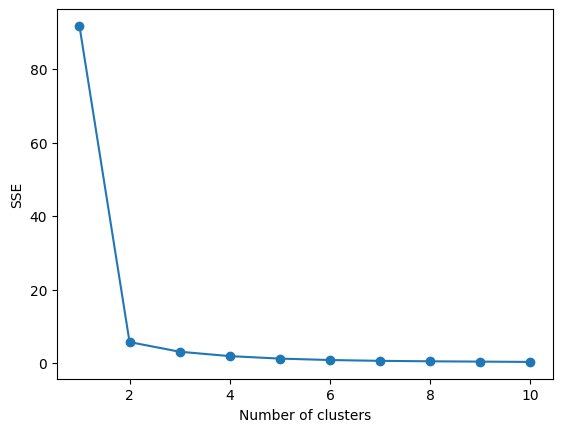

[[ 4.18348960e-03  3.71382887e-03  2.68203917e-04 -3.42735018e-04
   1.92624536e-02 -1.84212415e-03  9.14875239e-03  1.91482849e-02
   1.20327495e-02 -5.58888708e-03 -4.67601974e-03  2.30851764e-02
   1.61761624e-03  1.89411430e-02  1.43405235e-02  1.66780482e-02
   1.39245915e-02  2.18518124e-02  1.94821567e-02  2.17705424e-02
   1.93247838e-02  1.15585092e-02  2.43658091e-02  2.37484190e-02
   1.38128512e-02  1.92778449e-02  1.85535598e-02  1.19239897e-02
   1.22604471e-02  1.90460739e-02  1.94303831e-02  1.41787294e-02
   1.78622963e-02  1.86582954e-02  1.44042767e-02  1.67675934e-02
   1.78996155e-03  1.57659071e-02  1.70799962e-02  1.82528514e-02
   1.88259924e-02  1.54459831e-02  2.34640719e-02  2.00372538e-02
   1.71857004e-02  8.85906746e-03  1.68438620e-03  1.89069738e-02
   2.04933849e-02  1.64311810e-02  1.58523102e-02  1.74172404e-02
   1.84342379e-02  2.12638330e-02  1.61275701e-02  1.57979375e-02
   1.74673249e-02  2.36329143e-02  1.66862359e-02  1.39926024e-02
   1.72595

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Elbow Method to determine the Number of Cluster —— for Calcium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

df_calcium= calcium.transpose()
title = 'data corr, significantly upregulated cells during awake brain state'
corr_calcium = df_calcium.corr()
vector = corr_calcium.values.flatten()

# calculate SSE for different k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vector.reshape(-1, 1))
    sse.append(kmeans.inertia_)

# draw a graph according to k
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## From the result, the Elbow method shows that Cluster is 2. Then we calculate 
## for the location.

kmeans1 = KMeans(n_clusters=2, random_state=42).fit(corr_calcium)
centers1 = kmeans1.cluster_centers_

print(kmeans1.cluster_centers_) # 2 cluster_centers location

print(kmeans1.labels_) # label for each 

## The hierarchical cluster analysis
### - refering to research paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7987346/

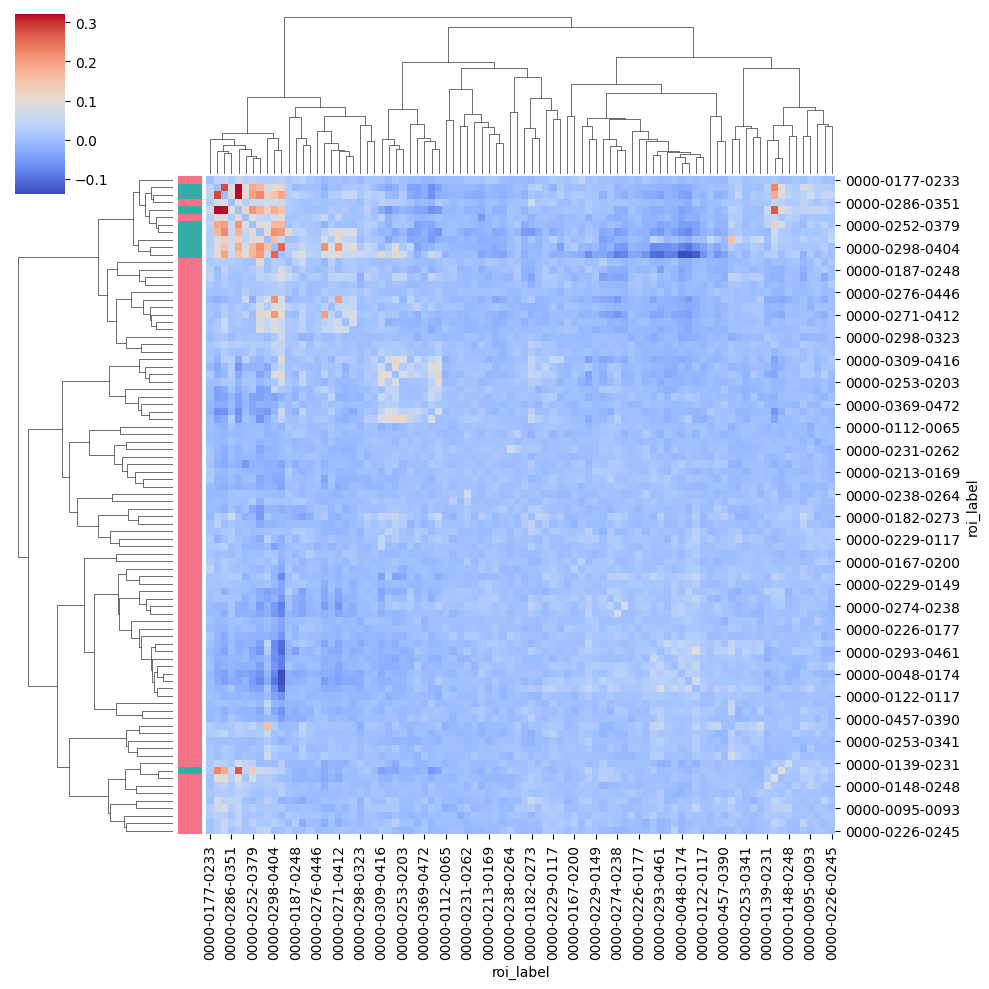

In [ ]:
# Calcium
# This code generates a heatmap of a correlation matrix for awake up
# Refering to Figure 4B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
import matplotlib
from matplotlib.colors import ListedColormap

##correlation matrix using Pearson’s r for all cell combinations
df_calcium= calcium.transpose(). ## we are using calcium as data
title = 'data corr, significantly upregulated cells during awake brain state'
corr_calcium = df_calcium.corr()

np.fill_diagonal(corr_calcium.values, 0)  # Set diagonal values to 0

d = 1 - corr_calcium
Z = hierarchy.linkage(d, method='complete')

cutoff = 0.7 
clusters = hierarchy.fcluster(Z, cutoff, criterion='distance')

# Generate colormap based on unique cluster values
n_clusters = len(np.unique(clusters))
colormap = ListedColormap(sns.color_palette("husl", n_clusters))

# Map each cluster value to a color using the colormap
row_colors = [colormap(c-1) for c in clusters]

# Generate heatmap with row colors
sns.clustermap(corr_calcium, method='complete', metric='correlation', cmap='coolwarm', 
               figsize=(10, 10), row_colors=row_colors)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
<ipython-input-66-a16c49b72b12>:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix_sq, method='average')


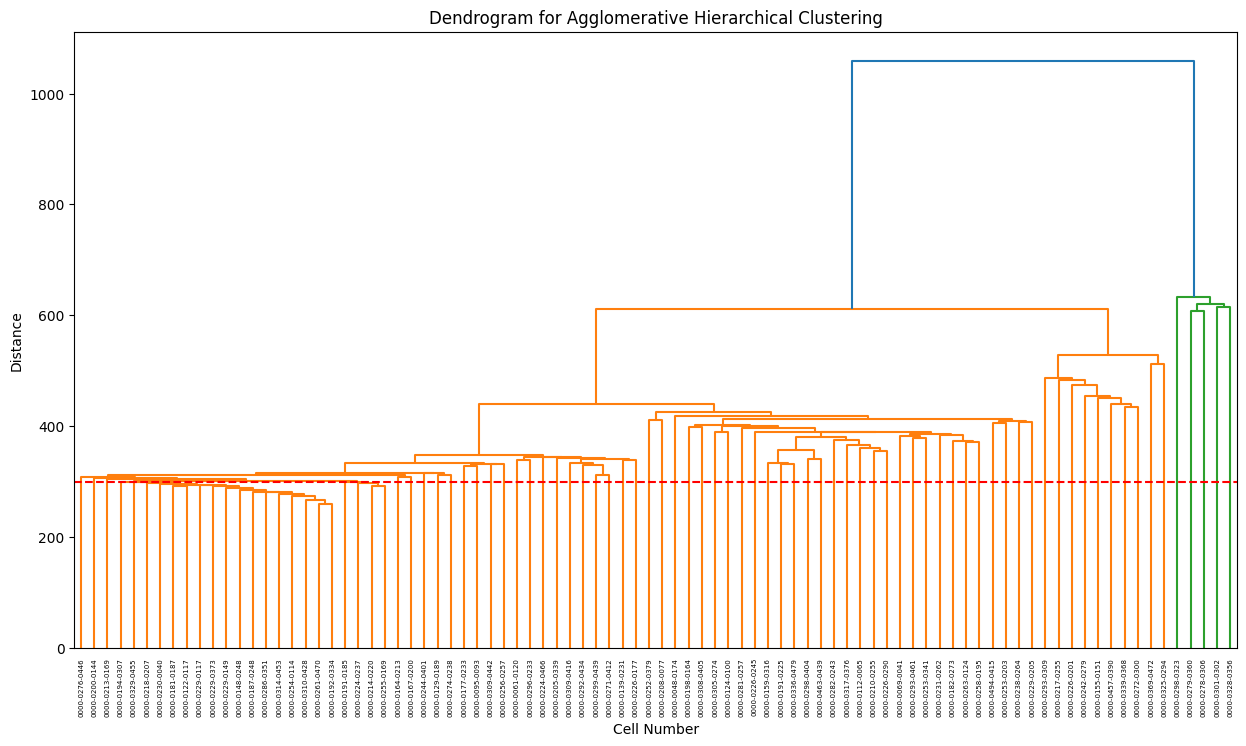

In [ ]:
## Refering to Figure 4C: Identification of clusters of correlated cells using agglomerative hierarchical clustering. 
## Clusters were combined using a standardized Euclidean distance metric and a weighted average linkage method 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

#standardized Euclidean distance metric
df = calcium
df_std = (df - df.mean()) / df.std()
dist_matrix = pdist(df_std, metric='euclidean')
dist_matrix_sq = squareform(dist_matrix)

# Perform agglomerative hierarchical clustering with weighted average linkage
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average', distance_threshold=0)
labels = model.fit_predict(dist_matrix_sq)

# Create a dendrogram plot with a vertical line indicating the 5% significance threshold
fig, ax = plt.subplots(figsize=(15, 8))
linkage_matrix = linkage(dist_matrix_sq, method='average')
dendrogram(linkage_matrix, ax=ax, labels=df.index)

# Add the significance threshold line
y_max = np.max(linkage_matrix[:, 2])
y_min = np.min(linkage_matrix[:, 2])
ax.axhline(y=0.05 * (y_max - y_min) + y_min, color='r', linestyle='--') 

ax.set_title("Dendrogram for Agglomerative Hierarchical Clustering")
ax.set_xlabel("Cell Number")
ax.set_ylabel("Distance")

plt.show()



### Further research: we need to determine the threshold (significant level) by shuffling the data with random test/ 

## comparing cluster in two matrix
### https://www.statmethods.net/advstats/cluster.html